# **Auto Grad**



*   an important feature in pytorch
*   Helps in calculating the gradients.



In [1]:
import torch as t

In [2]:
# remember to add true arg if you are doing gradient oepration in future
x = t.randn(3 , requires_grad=True)
print(x)

tensor([-0.8853,  1.1528, -0.7678], requires_grad=True)


In [4]:
# we have a operation
y = x+2
# forward pass-> calculate output -> calculate gradient-> backward pass(we will have a function here)-> caclaute gradeint of y wrt to x)
print(y)

z=y*y*2
# without the mean operation you need vector to multiply since we are doing jacobian product
#After applying mean fucntion the values comes back to scalar
#So we don't need any vector
z=z.mean()
print(z)

z.backward()
print(x.grad)

# we can consider above code as we are biulding a network which goes some operations and the output is 'z'

tensor([1.1147, 3.1528, 1.2322], grad_fn=<AddBackward0>)
tensor(8.4671, grad_fn=<MeanBackward0>)
tensor([2.9724, 8.4074, 3.2859])


In [5]:
#trying without mean()
# we have a operation
y = x+2
print(y)
z=y*y*2
#z=z.mean()
print(z)
z.backward()
print(x.grad)

tensor([1.1147, 3.1528, 1.2322], grad_fn=<AddBackward0>)
tensor([ 2.4849, 19.8799,  3.0366], grad_fn=<MulBackward0>)


RuntimeError: ignored

In [7]:
y = x+2
print(y)
z=y*y*2
#z=z.mean()
#Now to solve this problem we need to declare a tensor
v= t.tensor([0.1,0.2,0.45],dtype=t.float32)
print(z)
z.backward(v)
print(x.grad)

tensor([1.1147, 3.1528, 1.2322], grad_fn=<AddBackward0>)
tensor([ 2.4849, 19.8799,  3.0366], grad_fn=<MulBackward0>)
tensor([ 3.4183, 10.9296,  5.5038])


# **How to avaoid the history?**






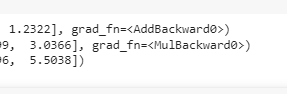

In [ ]:
#use detach
#change requires_grad=False
#wrap with torch.no_grad():


In [8]:
y=x.detach()
print(y)

tensor([-0.8853,  1.1528, -0.7678])


In [9]:
with t.no_grad():
  y=x+3
  print(y)

tensor([2.1147, 4.1528, 2.2322])


In [11]:
w=t.ones(4,requires_grad=True)
for e in range(2):
  m_output=(w*3).sum()
  m_output.backward()
  print(w.grad)

# for every iteration the gradients will be sum up
#to avaoid this we meed make them zero

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])


# After every iteartion we need use `weights.grad.zero_()`

In [12]:
w=t.ones(4,requires_grad=True)
for e in range(3):
  m_output=(w*3).sum()
  m_output.backward()
  print(w.grad)
  w.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
